Nancy Thomas

In [4]:
from datascience import *
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

For question three, my overarching goal was to visualize relationships within my data. I split this into two sub-questions. The first was to visualize the relationship between victim age and perpetrator age. I will do this by plotting perpetrator age versus victim age in a scatter plot. I plan to analyze the correlation between the two variables, and will try to find the line of best fit for the data. I will then split the data by perpetrator race, as I have done in some of my previous questions, and see if there appears to be a relationship between victim age, perpetrator age, and perpetrator race. I suspect that there is a general positive correlation between victim and perpetrator ages, and I also suspect that there is some relationship betweent these two variables and race. My hypothesis is that people of color tend to be involed in crime at a younger age than white people. For my next sub-question, I would like to visualize the relationship between victim race and whether or not the crime was solved. I intend to do this by using a bar chart to show the difference between percentage of solved and unsolved crimes for each race. Based off previous knowledge, my hypothesis is that among crimes with a non-white victim, relatively fewer homicdes are solved than if the victim was white.

In [5]:
homicides = Table().read_table('nancy_data_set.csv')
homicides_2 = homicides.where('Crime Solved', are.equal_to('Yes'))
# we select out only the crimes that are solved, so that the perpetrator age is known

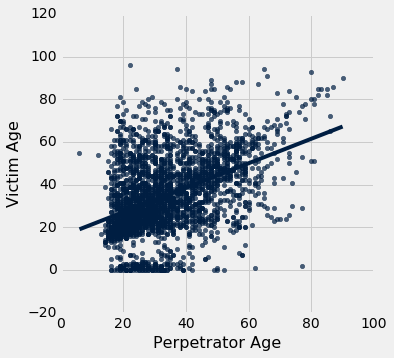

In [6]:
# this cell plots the victim age versus the perpetrator age
bad_col = homicides_2.column('Perpetrator Age')
# for some reason, the values for Perpetrator Age are strings, rather than ints (Victim Ages are ints already)
homicides_2 = homicides_2.with_column('New Age',bad_col.astype(int)).relabeled('New Age','Perpetrator Age')
homicides_2 = homicides_2.where('Victim Age', are.between(0,110)).where('Perpetrator Age', are.between(1,110))
sample = homicides_2.sample(3000, with_replacement = False)
# I took a sample because there were too many points on the original plot to be able to see any trends
sample.scatter('Perpetrator Age','Victim Age', fit_line = True)

In [8]:
# this cell find the correlation coefficient
def standard_units(any_numbers):
    return (any_numbers - np.mean(any_numbers))/np.std(any_numbers)

def correlation(t, x, y):
    return np.mean(standard_units(t.column(x))*standard_units(t.column(y)))
r = correlation(homicides_2, 'Perpetrator Age', 'Victim Age')
r

0.43731647345187757

In [9]:
# this cell creates a function that defines the best fit line if it has a linear form
def linear_mse(slope, intercept):
  x = sample.column('Perpetrator Age')
  y = sample.column('Victim Age')
  fitted = slope*x + intercept
  return np.sum((y - fitted) ** 2)

In [10]:
# this cell creates a function that defines the best fit line if it had a quadratic form
def quadratic_mse(a, b, c):
  x = sample.column('Perpetrator Age')
  y = sample.column('Victim Age')
  fitted = a*(x**2) + b*x + c
  return np.mean((y - fitted) ** 2)

(0, 120)

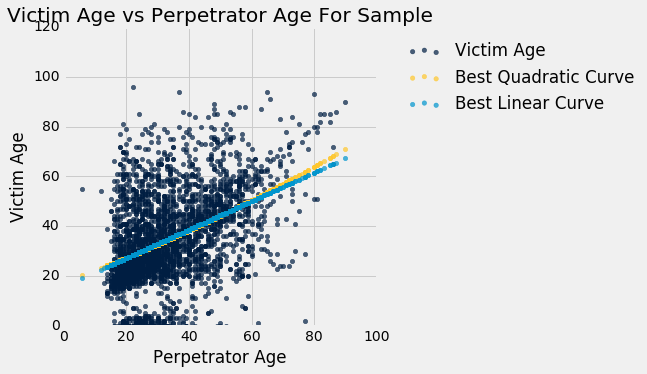

In [11]:
# this cell plots the scatter plot of victim age versus perpetrator age and two possible curves of best fit (linear and quadratic)
best = minimize(quadratic_mse)
best_l = minimize(linear_mse)
x = sample.column('Perpetrator Age')
lin_fit = best_l.item(0) * x + best_l.item(1)
quad_fit = best.item(0)*(x**2) + best.item(1)*x + best.item(2)
homicides_quad = sample.select('Perpetrator Age','Victim Age').with_column('Best Quadratic Curve',quad_fit,'Best Linear Curve', lin_fit).scatter(0)
plots.ylabel('Victim Age')
plots.title('Victim Age vs Perpetrator Age For Sample')
plots.ylim(0,120)

From this, I can see that the best quadratic and best linear curves are actually very similar. There is a trade off between similicity (which I find with the linear curve), and having a slightly better fit (which I find with the quadratic curve). Looking at this graph, I would go with the linear model as an estimator, as they are essentially the same, but the linear estimator is much simpler.

Since the r value is about 0.44, I would say that there is a weak to moderate association between perpetrator age and victim age.

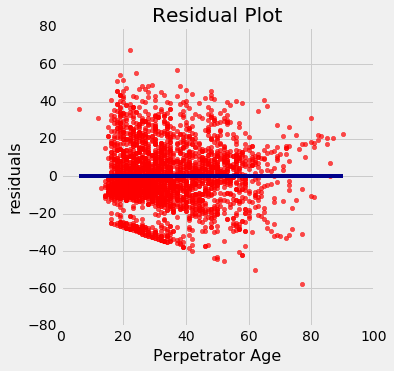

In [25]:
# this set of functions is taken from a class lecture
# together these functions find the linear line of best fit and the residuals and plot the residuals
def slope(t, label_x, label_y):
    r = correlation(t, label_x, label_y)
    return r*np.std(t.column(label_y))/np.std(t.column(label_x))
def intercept(t, label_x, label_y):
    return np.mean(t.column(label_y)) - slope(t, label_x, label_y)*np.mean(t.column(label_x))
def fit(table, x, y):
    # height of regression line
    a = slope(table, x, y)
    b = intercept(table, x, y)
    return a * table.column(x) + b
def residual(table, x, y):
    # the residual is the difference between a point and its estimate from the line of best fit
    return table.column(y) - fit(table, x, y)
def residual_plot(table, x, y):
    x_array = table.column(x)
    t = Table().with_columns(x, x_array,'residuals', residual(table, x, y))
    t.scatter(x, 'residuals', color='r')
    xlims = make_array(min(x_array), max(x_array))
    plots.plot(xlims, make_array(0, 0), color='darkblue', lw=4)
    plots.title('Residual Plot')
residual_plot(sample, 'Perpetrator Age','Victim Age')

The residuals appear to be distributed roughly evenly, and there does not seem to be a pattern. Thus, the linear model for the line of best fit seems to be good,

(0, 150)

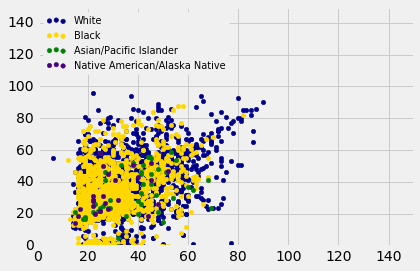

In [12]:
# this cell splits the data according to perpetrator race, and plots it on a scatter plot
sample_1 = sample.where('Perpetrator Race', are.equal_to('White'))
sample_2 = sample.where('Perpetrator Race', are.equal_to('Black'))
sample_3 = sample.where('Perpetrator Race', are.equal_to('Asian/Pacific Islander'))
sample_4 = sample.where('Perpetrator Race', are.equal_to('Native American/Alaska Native'))
plots.scatter(sample_1.column('Perpetrator Age'), sample_1.column('Victim Age'), color='darkblue', label = 'White')
plots.scatter(sample_2.column('Perpetrator Age'), sample_2.column('Victim Age'), color='gold', label = 'Black')
plots.scatter(sample_3.column('Perpetrator Age'), sample_3.column('Victim Age'), color='green', label = 'Asian/Pacific Islander')
plots.scatter(sample_4.column('Perpetrator Age'), sample_4.column('Victim Age'), color='indigo', label = 'Native American/Alaska Native')
plots.legend(loc = 'upper left', fontsize = 'x-small')
plots.ylim(0,150)
plots.xlim(0,150)

I was curious about what the scatter plot might look like if I broke it up by race. As can be see from the above plot, there isn't much of a visible difference in the distribution of the points when broken up by race. I then wanted to see if there is a visible difference in age between the four races if I calculated the median age of perpetrators and victims, and compared it to the median age of the population.

In [13]:
# this cell calculates the median perpetrator age for each race
h_2 = homicides_2.where('Victim Race', are.not_equal_to('Unknown')).where('Perpetrator Race', are.not_equal_to('Unknown'))
h_2 = h_2.select('Perpetrator Race','Perpetrator Age').group('Perpetrator Race', np.median).sort('Perpetrator Age median', descending = True)
h_2

Perpetrator Race,Perpetrator Age median
Asian/Pacific Islander,40
White,33
Native American/Alaska Native,28
Black,26


In [14]:
# this cell calculates the median victim age for each race
h_1 = homicides.where('Victim Race', are.not_equal_to('Unknown')).where('Perpetrator Race', are.not_equal_to('Unknown'))
h_1 = h_1.select('Victim Race','Victim Age').group('Victim Race', np.median).sort('Victim Age median', descending = True)
h_1

Victim Race,Victim Age median
Asian/Pacific Islander,37
White,35
Native American/Alaska Native,33
Black,28


It is interesting to see that from this data, there does appear to be a difference between median victim and perpetrator ages depending on race. Perhaps, the plot was too crowded to be able to see this. Does this data reflect something significant about the data, or does it follow from census data on the median age of people in the United Staes, broken up by race? I got data on the age of the population from statista.

In [15]:
# this cell shows the median age of the US population, split by race
pop_age = Table().with_columns('Race', make_array('White', 'Asian/Pacific Islander', 'Black','Native American/Alaska Native'), 'Median Pop Age', make_array(42.9,36.3,33.3,32.5))
pop_age

Race,Median Pop Age
White,42.9
Asian/Pacific Islander,36.3
Black,33.3
Native American/Alaska Native,32.5


In [17]:
h_3 = h_2.relabel('Perpetrator Race','Race')
h_4 = h_1.relabel('Victim Race','Race')

Race,Perpetrator Age median,Median Pop Age,Victim Age median
Asian/Pacific Islander,40,36.3,37
Black,26,33.3,28
Native American/Alaska Native,28,32.5,33
White,33,42.9,35


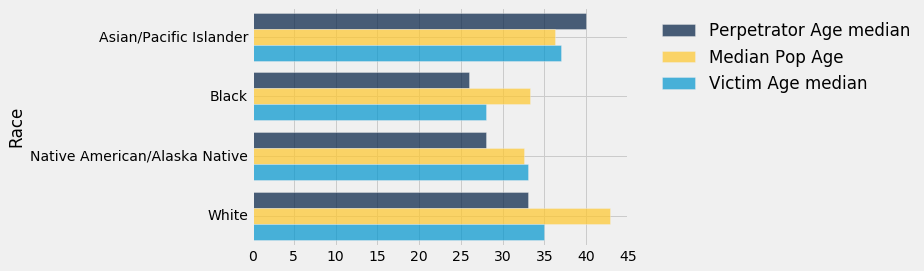

In [18]:
# this cell plots a bar graph of the median perpetrator, victim, and population ages
age = h_3.join('Race',pop_age).join('Race',h_4)
age.barh('Race')
age

This data is interesting, but slightly hard to read. It might be easier to see if I plot the deviations of the victim and perpetrator ages from the median population age.

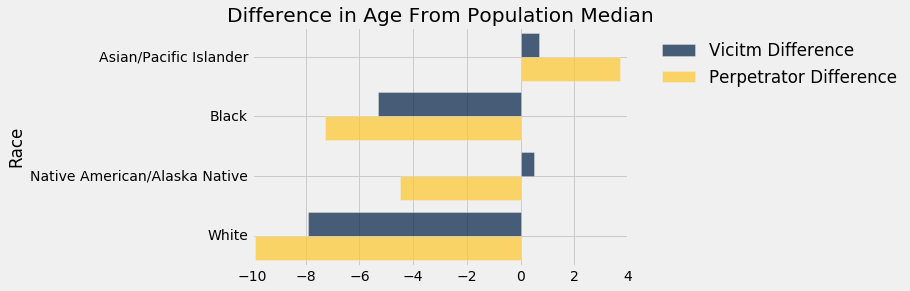

In [22]:
# this cell plots the difference between the victim age and median population age, and the perpetrator age and median population age
age_diff = age.with_columns('Vicitm Difference', age.column(3)-age.column(2), 'Perpetrator Difference', age.column(1)-age.column(2)).drop(1).drop(1).drop(1)
age_diff.barh('Race')
plots.title('Difference in Age From Population Median')

Here, I can see that my original hypothesis is partially disproven. It appears that the deviation from the median population age tends to be highest among white victims and white perpetrators.

Next, I would like to visualize the relationship between the victim's race and whether or not the crime is solved.

Victim Race,% not solved,% solved
Asian/Pacific Islander,27.897,72.103
Black,40.1406,59.8594
Native American/Alaska Native,20.354,79.646
Unknown,39.0805,60.9195
White,20.4596,79.5404


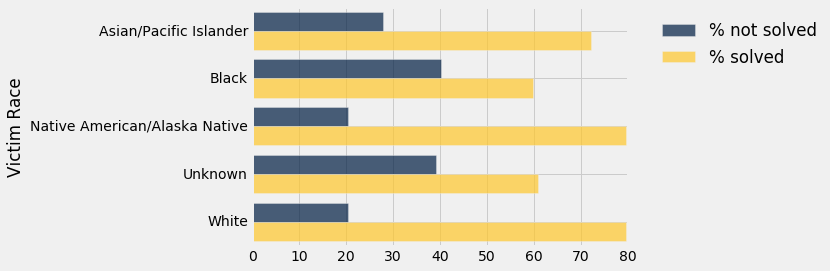

In [20]:
# this cell creates a pivot table of victim race and crime solved
piv = homicides.pivot('Crime Solved','Victim Race')
total = piv.column('No') + piv.column('Yes')
piv = piv.with_columns('% not solved', (piv.column('No')/total) * 100, '% solved', (piv.column('Yes')/total)*100).drop('No').drop('Yes')
# here, I found the percentage of crimes with victims of each race that were solved and not solved and plotted them
piv.barh('Victim Race')
piv

Again, I think the data is a bit easier to analyze if I look at the difference between the percentage of homicides solved and not solved.

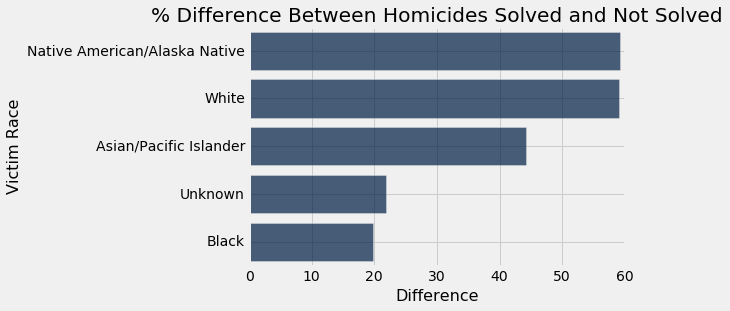

In [21]:
# here I find the difference between the percentage of crimes solved and not solved and plot it for each race
with_diff = piv.with_column('Difference', piv.column('% solved') - piv.column('% not solved'))
diff = with_diff.drop('% not solved').drop('% solved')
diff.sort('Difference', descending = True).barh('Victim Race')
plots.title('% Difference Between Homicides Solved and Not Solved')

Here, my hypothesis is proven to be mostly correct. Among homicides with white victims, the difference between the percentage of crimes solved and not solved is the largest, and among Asian and black victims, it is the smallest. It was somewhat unexpected to see that the population with the highest percentage difference between homicides that are solved and not solved is the Native American population. The data I will look at most, however, is the data for black and white victims, as I believe it is more reliable because there is way more data on this group of homicides. 